## Basic MLR

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

cleaned = pd.read_csv('datasets/cleaned_life_expectancy_data.csv')
X = cleaned.drop(columns=['Life Expectancy'])
y = cleaned['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

Mean Squared Error (MLR): 13.513817159881349


Mean Squared Error (MLR): 13.513817159881349


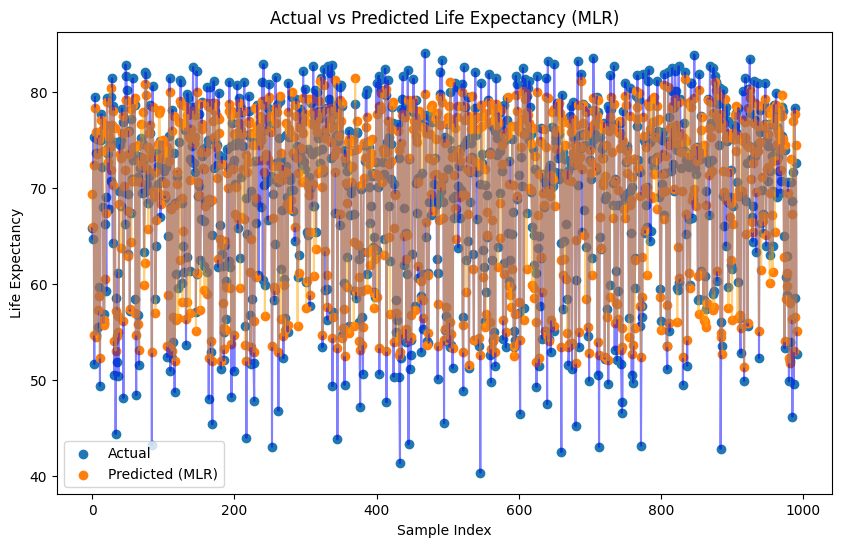

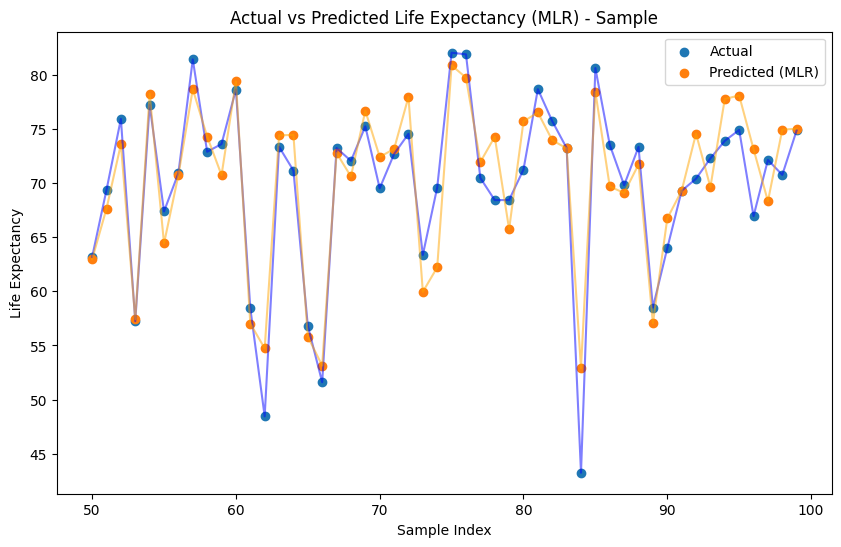

In [12]:
# Calculate the mean squared error
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
print(f'Mean Squared Error (MLR): {mse_mlr}')

import matplotlib.pyplot as plt

# Plot the MSE for MLR
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o')
plt.scatter(range(len(y_pred_mlr)), y_pred_mlr, label='Predicted (MLR)', marker='o')
plt.plot(range(len(y_test)), y_test, linestyle='-', color='blue', alpha=0.5)
plt.plot(range(len(y_pred_mlr)), y_pred_mlr, linestyle='-', color='orange', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy (MLR)')
plt.legend()
plt.show()

# Take a subsection of sample indexes around 50
sample_indexes = range(50, 100)
y_test_sample = y_test.iloc[sample_indexes]
y_pred_mlr_sample = y_pred_mlr[sample_indexes]

# Plot the MSE for MLR for the sample
plt.figure(figsize=(10, 6))
plt.scatter(sample_indexes, y_test_sample, label='Actual', marker='o')
plt.scatter(sample_indexes, y_pred_mlr_sample, label='Predicted (MLR)', marker='o')
plt.plot(sample_indexes, y_test_sample, linestyle='-', color='blue', alpha=0.5)
plt.plot(sample_indexes, y_pred_mlr_sample, linestyle='-', color='orange', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy (MLR) - Sample')
plt.legend()
plt.show()